


# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

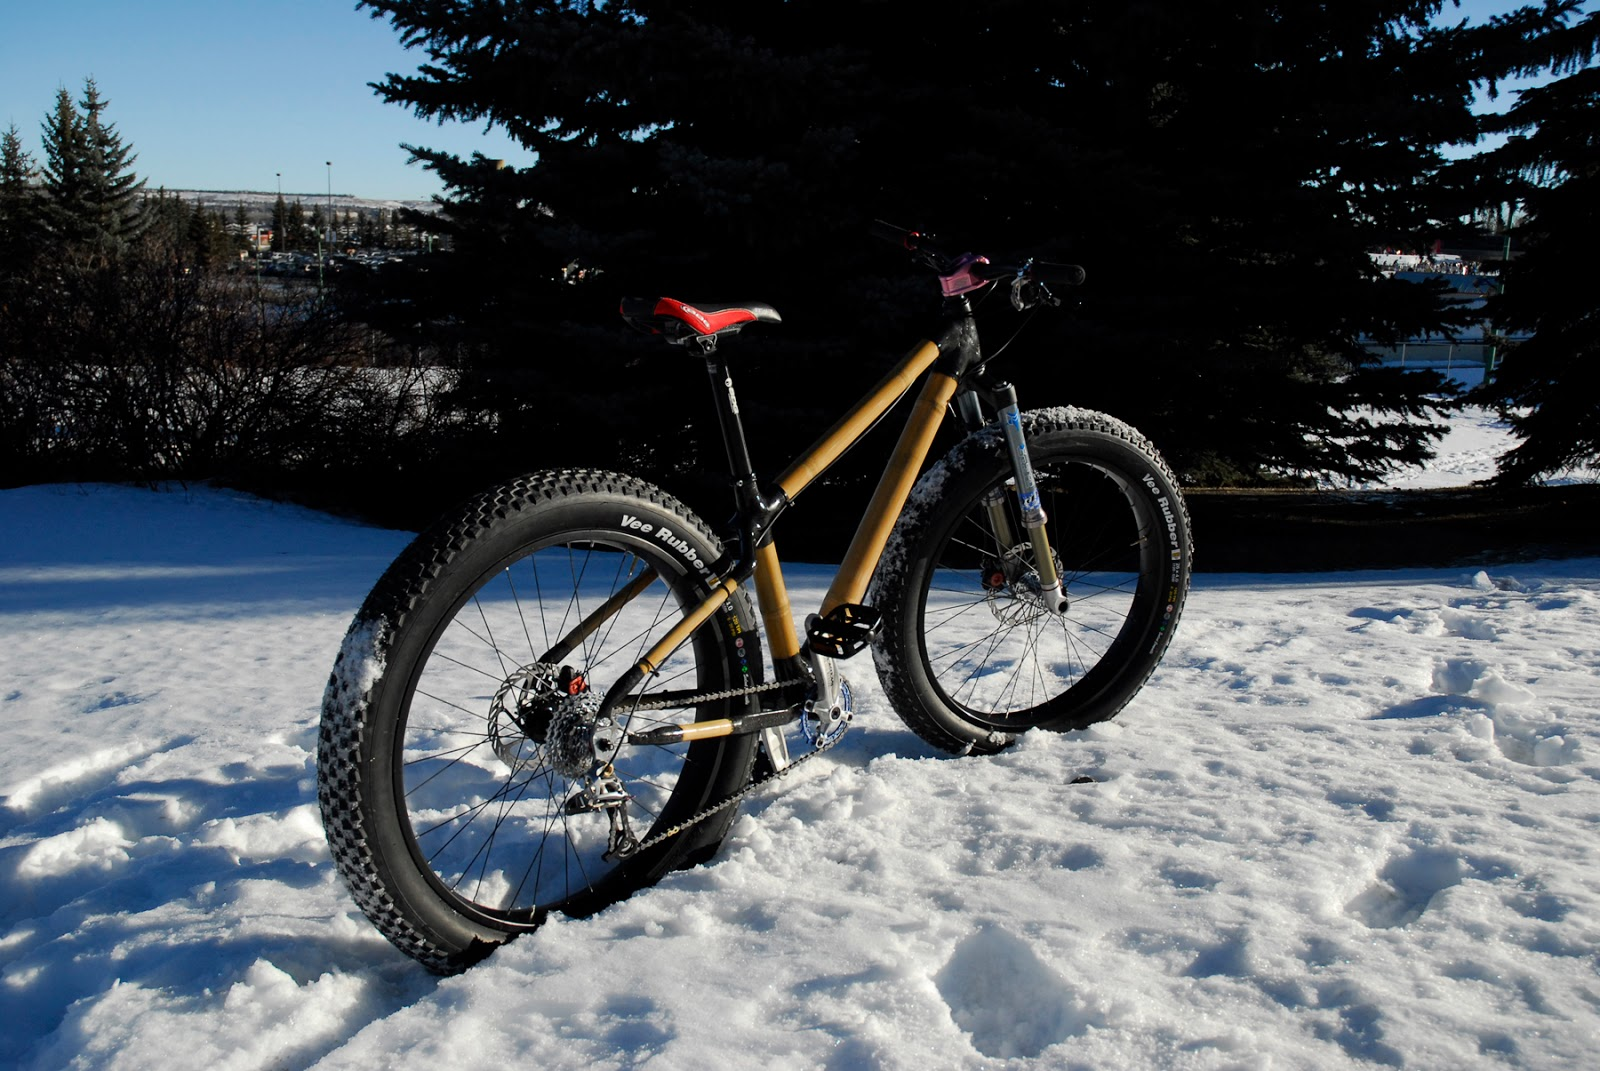

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# importing required libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting drive where data file is present.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing the data
bike_df = pd.read_csv('/content/drive/MyDrive/data set/SeoulBikeData.csv',encoding = "ISO-8859-1")

# Data Pre-Processing

In [4]:
# getting heads on data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# taking a look at the columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# checking the info of data
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# checking the shape of data
bike_df.shape

(8760, 14)

In [9]:
# detecting missing values if any
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# statistical information of our data
bike_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# Exploratory Data Analysis

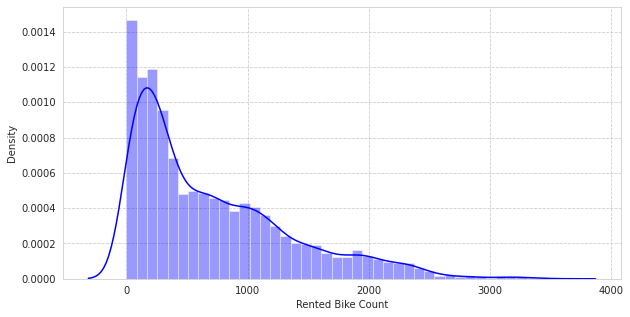

In [11]:
# visualizing distribution of our dependent variable
plt.figure(figsize=(10,5),)
sns.distplot(bike_df['Rented Bike Count'], color='b')

Since the assumption of linear Regression is “The distribution of dependent variable has to be normal” hence we will perform square root transformation on our dependent variable.

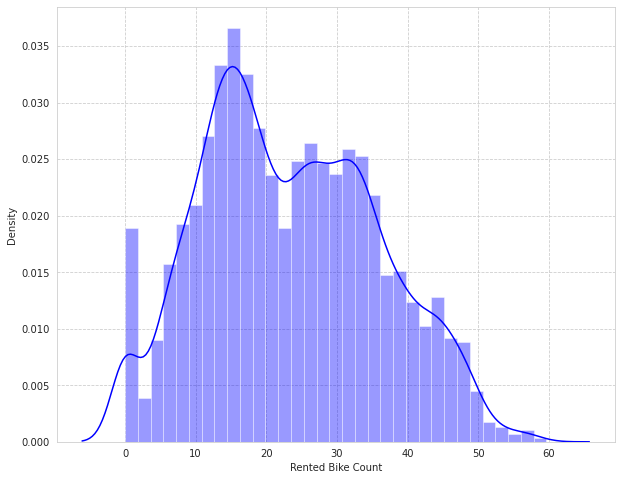

In [12]:
# square_root transformation
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']),color='b')

In [13]:
# Date columns to Date format conversion
bike_df['Date']= pd.to_datetime(bike_df['Date'])

In [14]:
# extracting day,month, day of week and weekdays/weekend from date column
bike_df['month'] = bike_df['Date'].apply(lambda x : x.month)
bike_df['day_of_week'] = bike_df['Date'].dt.day_name()
bike_df['weekdays_weekend']=bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day_of_week'],axis=1)

Lets Extract Numeric Features From Our Data

In [15]:
# Numeric Features
numeric_features= bike_df.select_dtypes(exclude='object')
numeric_features.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [17]:
# Numeric Features info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
 11  weekdays_weekend           8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [18]:
# describing numeric feature
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


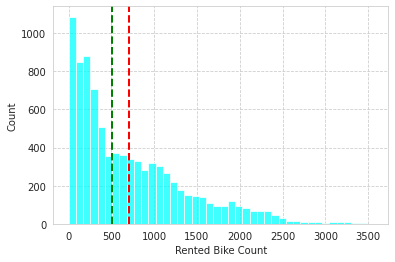

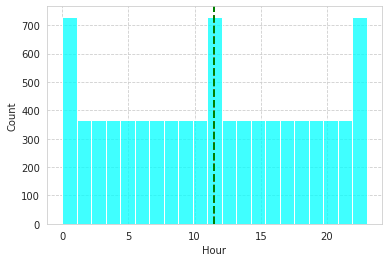

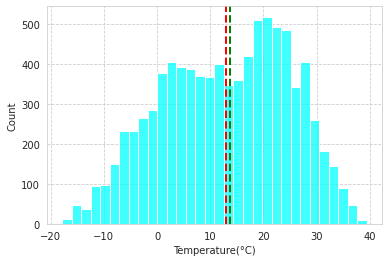

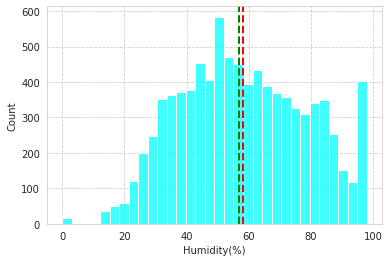

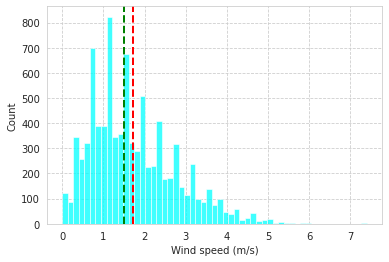

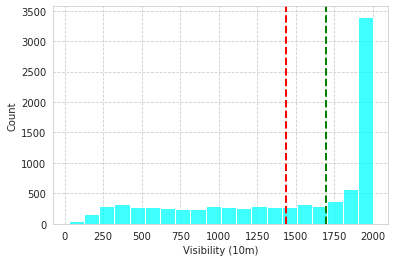

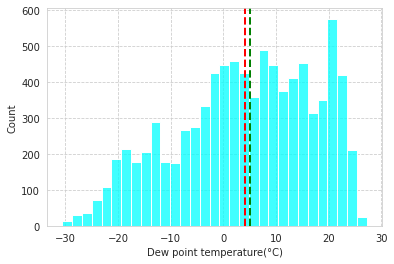

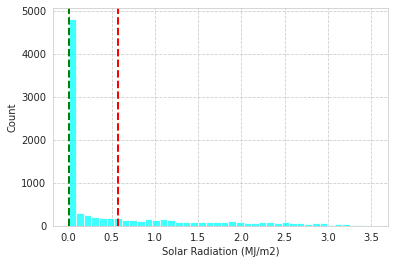

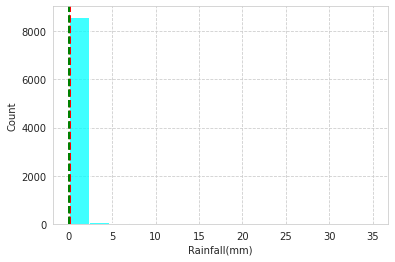

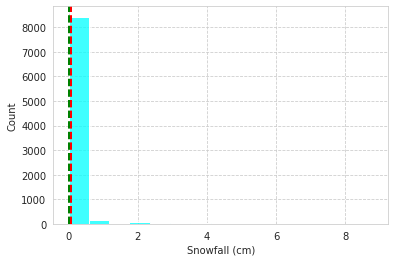

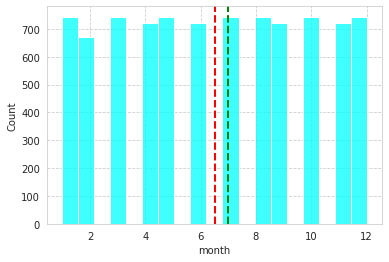

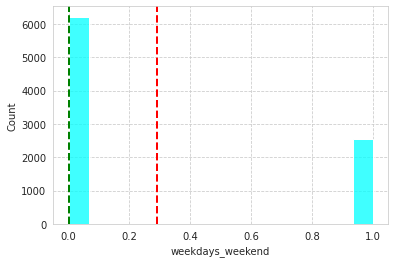

In [19]:
# having a look at the distribution of our numeric features

for col in numeric_features[:]:
  sns.histplot(bike_df[col], color='cyan')
  plt.axvline(bike_df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='g', linestyle='dashed', linewidth=2)   
  plt.show()

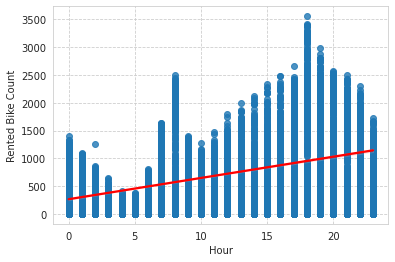

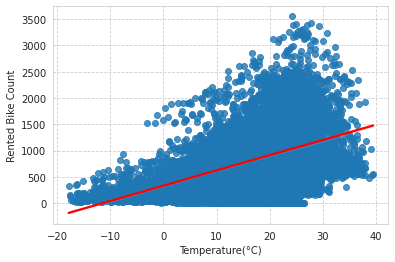

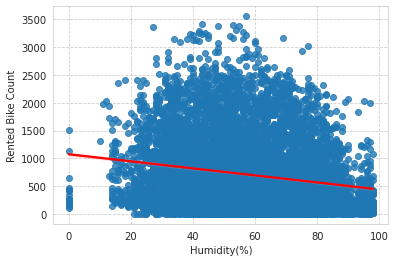

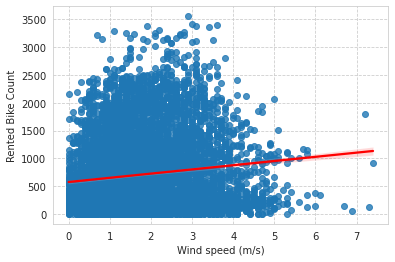

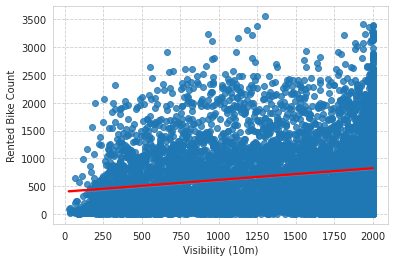

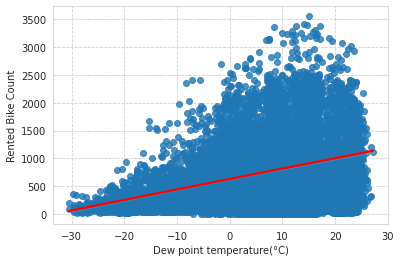

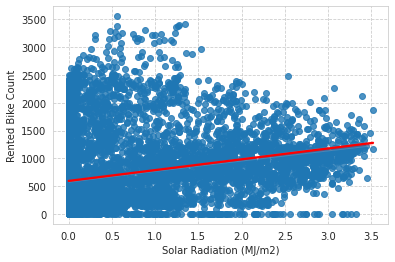

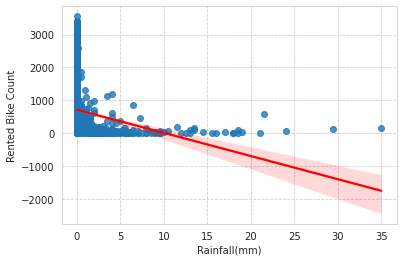

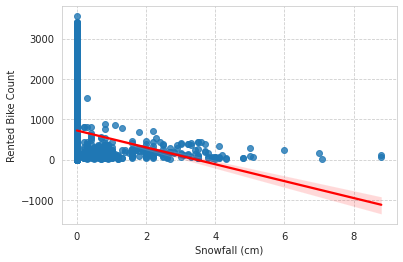

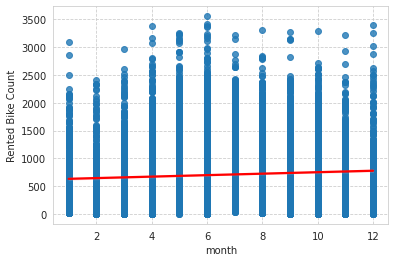

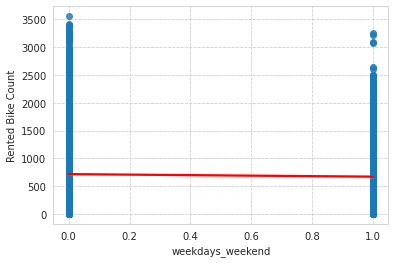

In [20]:
# plotting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=bike_df[col],y=bike_df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

In [21]:
# Extracting categorical features
categorical_features= bike_df.select_dtypes(include='object')

In [22]:
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


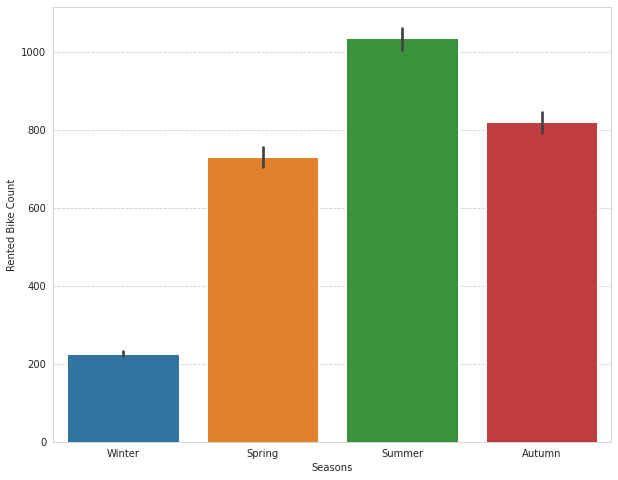

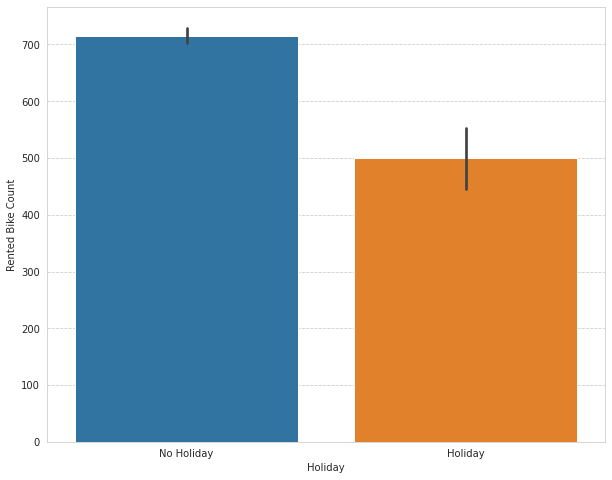

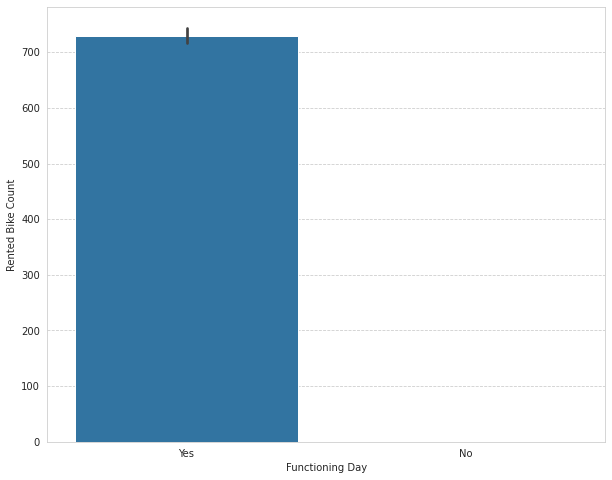

In [23]:
# ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.barplot(x=bike_df[col],y=bike_df["Rented Bike Count"])
  plt.show()

Conclusion


*   Less demand in winter season
*   Slightly higher demand during non holidays
*   almost no demand on non_functioning day

In [25]:
# checking counts of functioning day
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

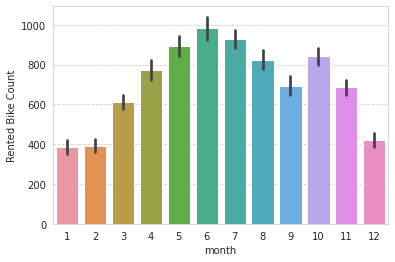

In [26]:
# checking monthly count of rented bikes
sns.barplot(x=bike_df['month'],y=bike_df['Rented Bike Count'])

### Conclusion
1. Months from may to july has higher rented bike counts.
2. and comparatively december to february months has lower demand

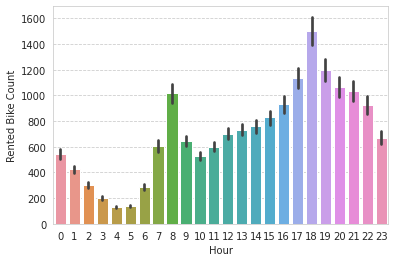

In [27]:
# checking hourly count of rented bikes
sns.barplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'])

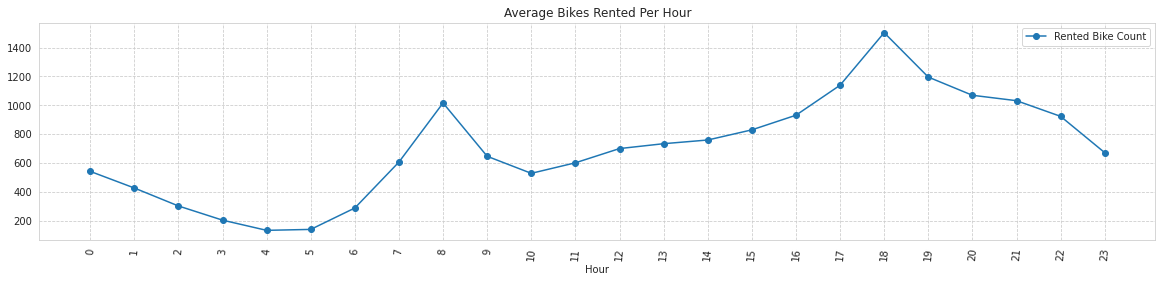

In [28]:
# ploting line graph
# grouping by Hours and getting average Bikes rented, and percent change
avg_rent_hrs = bike_df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hour")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

Conclusion


*   High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.
*   We can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand






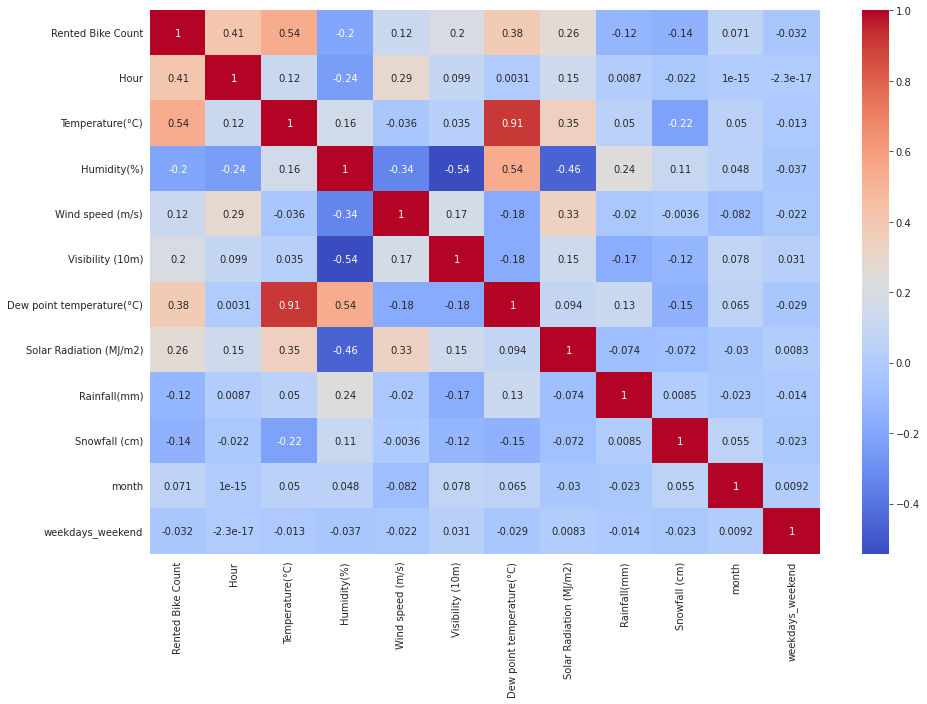

In [30]:
# checking correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')

#Feature Engineering

In [31]:
# creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [32]:
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1
...,...,...,...,...,...
8755,0,0,0,1,1
8756,0,0,0,1,1
8757,0,0,0,1,1
8758,0,0,0,1,1


In [33]:
# concating numeric columns and dummy columns and creating final_df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [34]:
# showing head of final_df
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0


In [35]:
# describing final_df
final_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Seasons_Spring,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Summer,8760.0,0.252055,0.434217,0.0,0.00,0.00,1.00,1.00
Seasons_Winter,8760.0,0.246575,0.431042,0.0,0.00,0.00,0.00,1.00
Holiday_No Holiday,8760.0,0.950685,0.216537,0.0,1.00,1.00,1.00,1.00
Functioning Day_Yes,8760.0,0.966324,0.180404,0.0,1.00,1.00,1.00,1.00
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40


Conclusion:

From hour v/s rented bike-

*   we can clearly see there is high demand of Rented bike between the office hours.

From working-nonworking v/s rented bike-

*   As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

From Rainfall v/s rented bike-

*   we can see that if Rainfall increase demand of Rented Bike Decreases

From Snowfall v/s rented bike-

*   we can see that if Snowfall increase demand of Rented Bike Decreases



Conclusion:


*   we can see that there less demand of Rented bike in the month of December, january,February i.e during winter seasons
*   Also demand of bike is maximum during May,june,july i.e Summer seasons



# FUNCTIONS

In [192]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [193]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

# training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  # finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  # finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  # finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  
  # finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n========================================================\n')

# appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


In [194]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n========================================================\n')
    
    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    # ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()


CREATING THE FUNTION TO GET FEATURE IMPORTANCE

In [195]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

TRAIN-TEST SPLIT

In [196]:
# getting independent variables
X=final_df.drop(['Rented Bike Count'],axis=1)

In [197]:
X.shape

(8760, 16)

In [198]:
# getting dependent variable
y=np.sqrt(final_df['Rented Bike Count'])

In [199]:
# splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [200]:
# scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Models

LINEAR REGRESSION

In [201]:
from sklearn.linear_model import LinearRegression

In [202]:
# linear regression model

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 175590.55287332062
RMSE : 419.035264474627
R2 : 0.5729108337712393
Adjusted R2 :  0.5697661367350404


  =========================================================  Evalution Graph  ===================================================



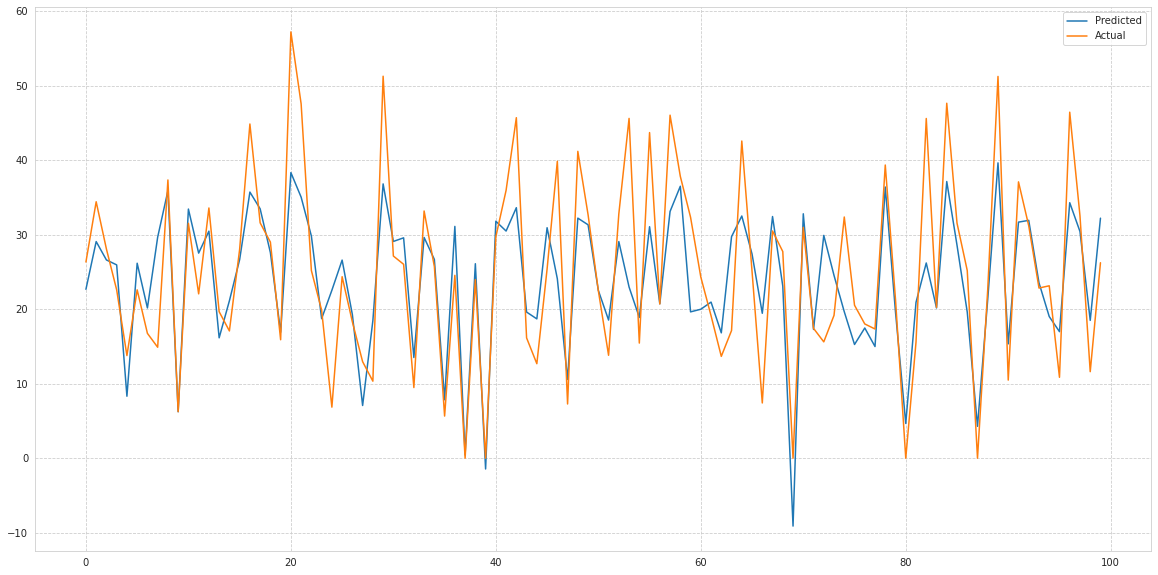

In [203]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

REGULARIASATION
LASSO REGRESSION

In [204]:
from sklearn.linear_model import Lasso

In [205]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
# setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)



================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856


  =========================================================  Evalution Graph  ===================================================



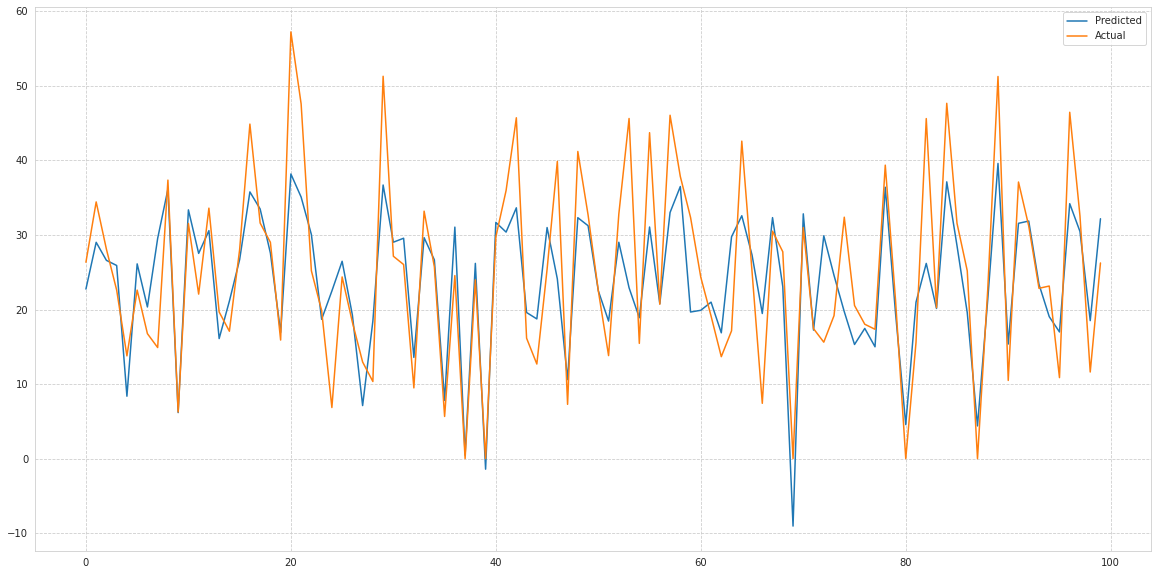

In [206]:
# calling train_linear_model to train,fit and evaluation of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

RIDGE REGRESSION

In [207]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)



================Evalution Matrix=========================

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443


  =========================================================  Evalution Graph  ===================================================



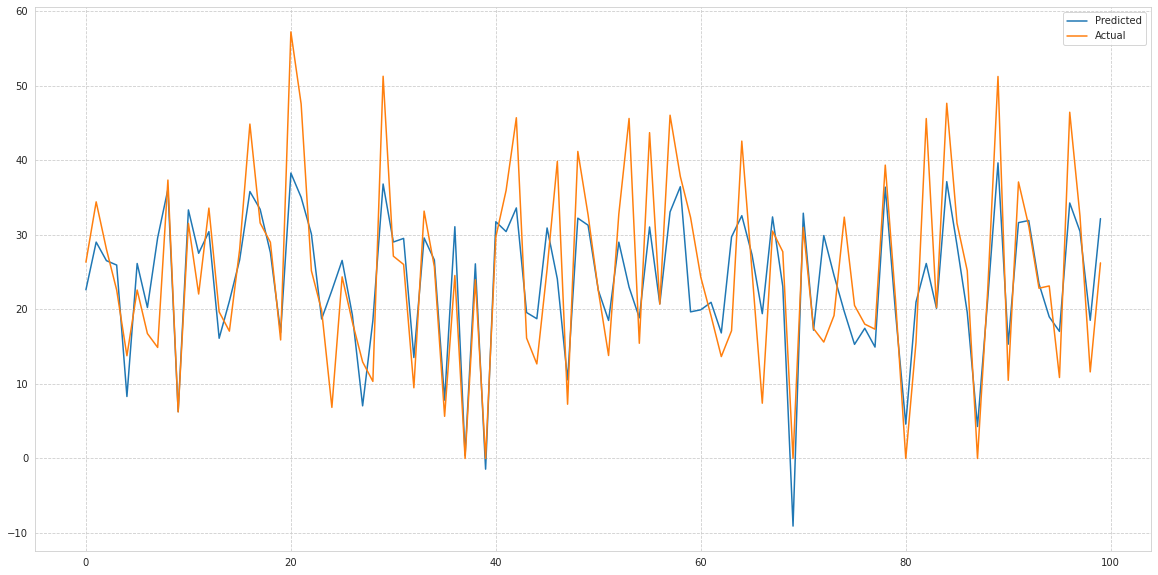

In [208]:
# calling train_linear_model to train,fit and evaluation of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

ELASTICNET

In [209]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)



================Evalution Matrix=========================

MSE : 175346.86749857932
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354


  =========================================================  Evalution Graph  ===================================================



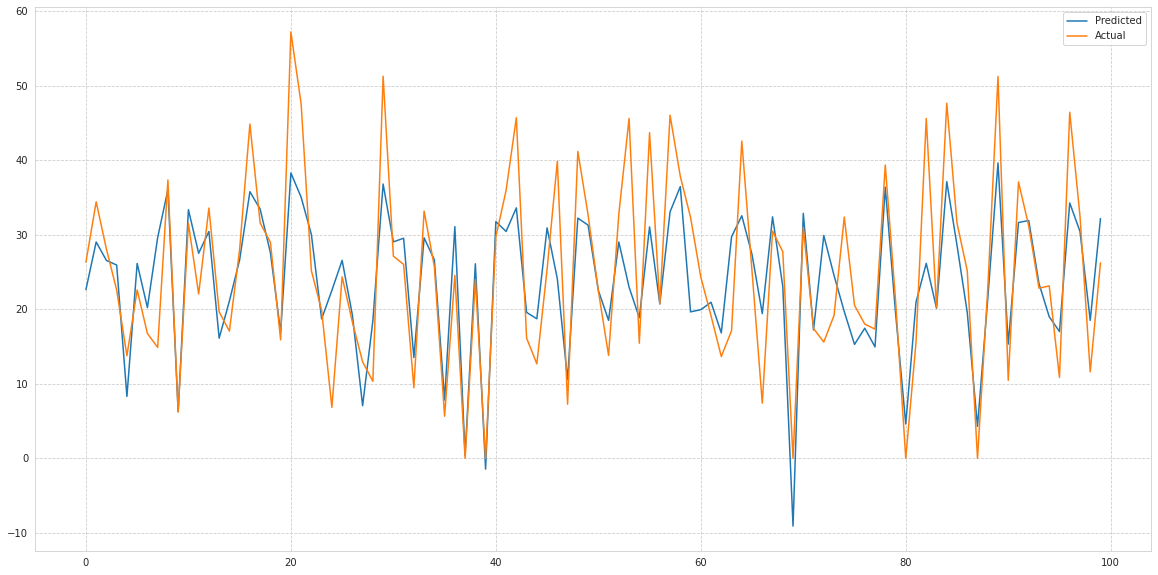

In [210]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

### KNN and Tree Based Method Models


Train | Test split Data For Tree based methods

In [211]:
# creating X for independent variable
X=final_df.drop(['Rented Bike Count'],axis=1)

In [212]:
# creating y for dependent variable
y=final_df['Rented Bike Count']

In [213]:
# spliting X and y to train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


KNN Regression

In [214]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [215]:
# creating model
scaler = MinMaxScaler()

In [216]:
# scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 83411.75920852358
RMSE : 288.81094025075225
R2 : 0.7961594359879383
Adjusted R2 :  0.7946585390600998


    =========================================================    Evalution Graph    ===================================================



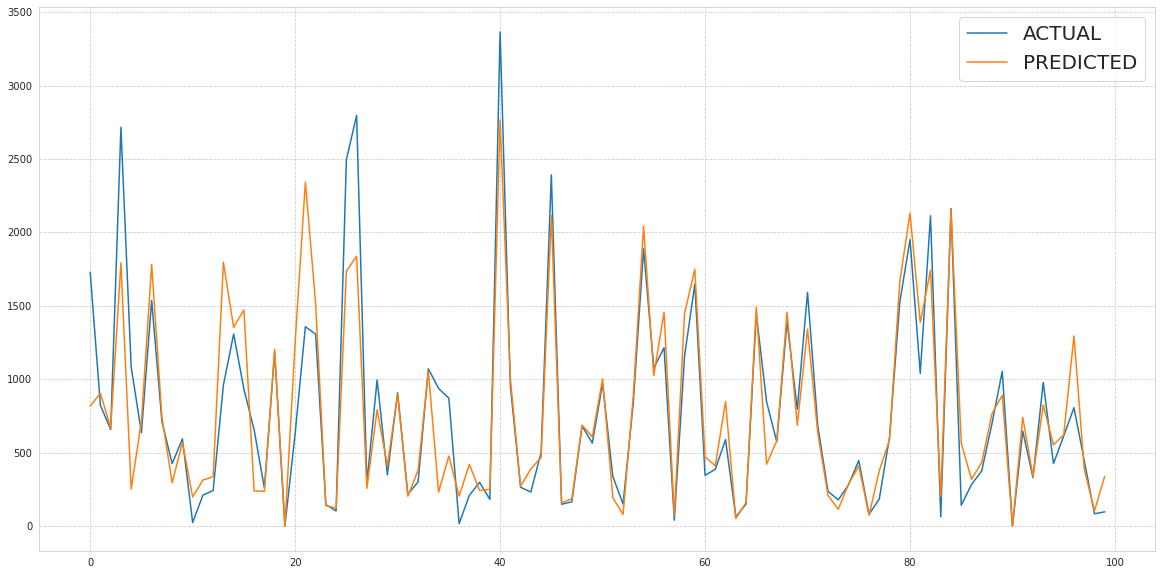

In [217]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

Decision Tree

In [218]:
from sklearn.tree import DecisionTreeRegressor


================Evalution Matrix=========================

MSE : 90242.37579908676
RMSE : 300.4036880583971
R2 : 0.7794668646816582
Adjusted R2 :  0.7778430588072479


    =========================================================    Evalution Graph    ===================================================



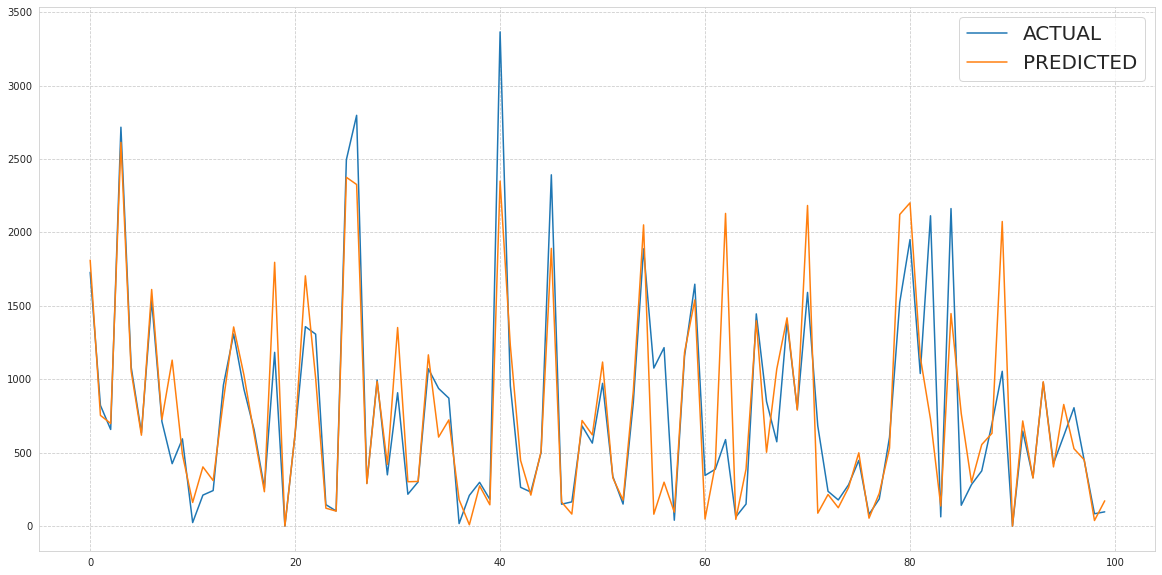

In [219]:
# creating decision tree model
dt_model = DecisionTreeRegressor()
# calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

Random Forest

In [220]:
# importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [221]:
# creating model of random forest
rf_model = RandomForestRegressor()

In [222]:
# creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}


In [223]:
# creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 61999.07323947347
RMSE : 248.9961309728998
R2 : 0.8484874773379918
Adjusted R2 :  0.8473718766188973


    =========================================================    Evalution Graph    ===================================================



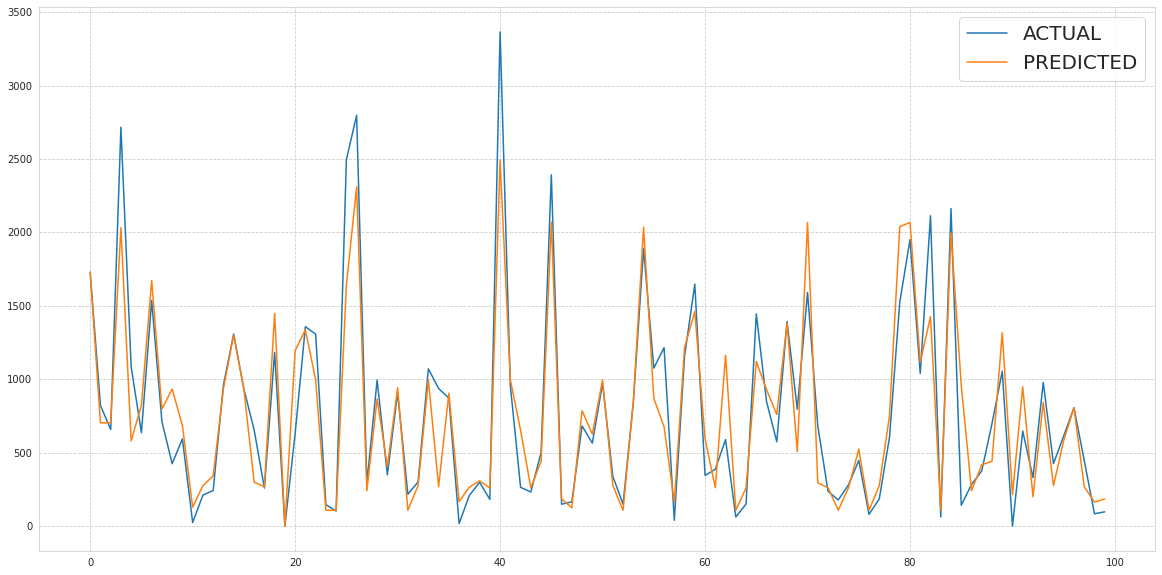

In [224]:
# calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [225]:
# optimal rf model
optimal_rf_model = rf_grid.best_estimator_

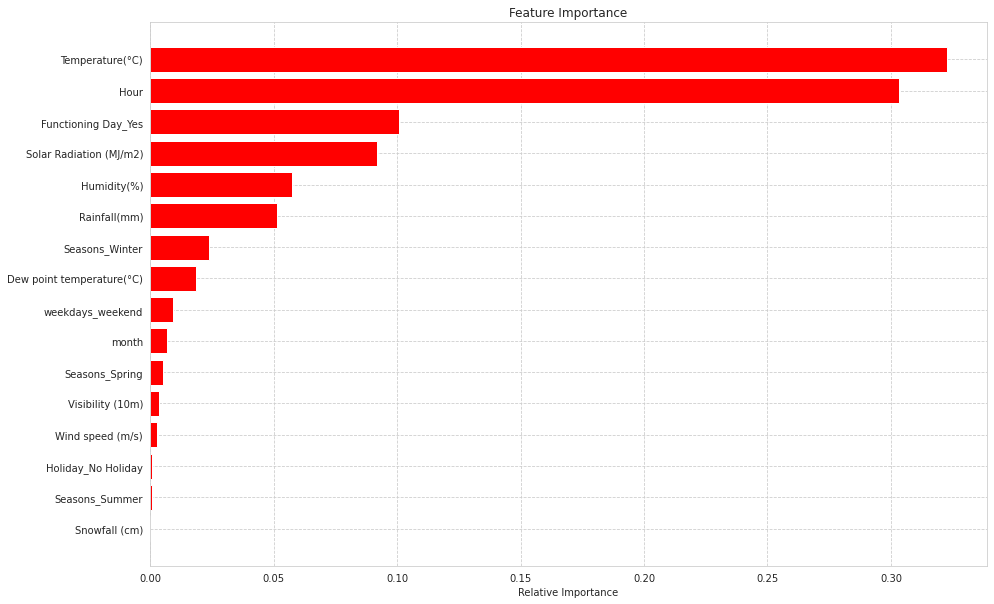

In [226]:
# getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

Gradient Boost 

In [227]:
# importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [228]:
# creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [229]:
# creating param dict to check different value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [230]:
# grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 54819.14237701159
RMSE : 234.1348807354675
R2 : 0.8660336982840462
Adjusted R2 :  0.8650472920127829


    =========================================================    Evalution Graph    ===================================================



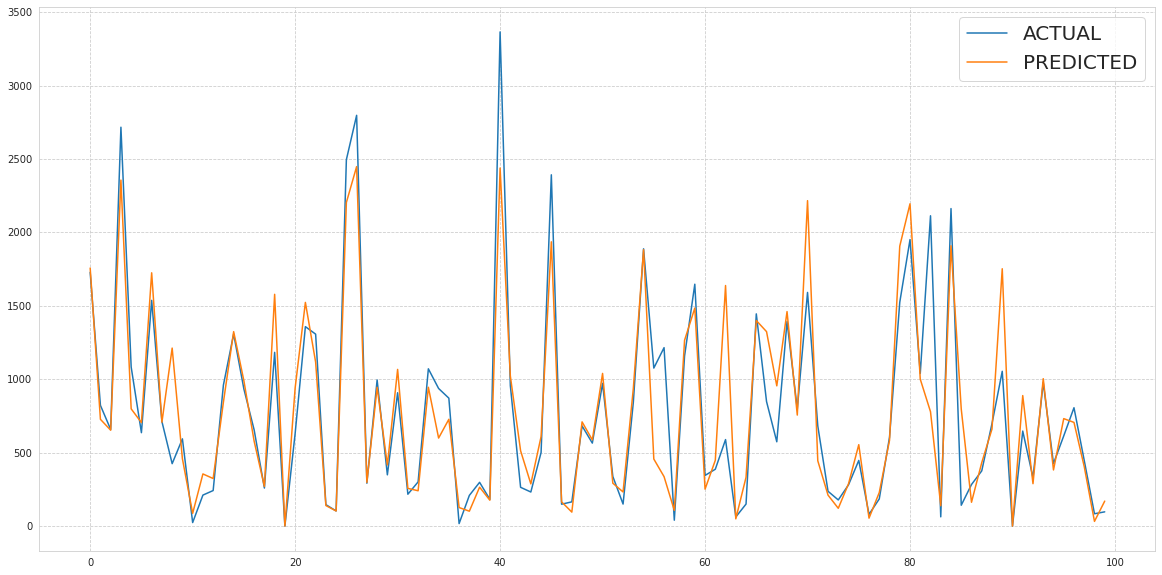

In [231]:
# calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [232]:
# getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

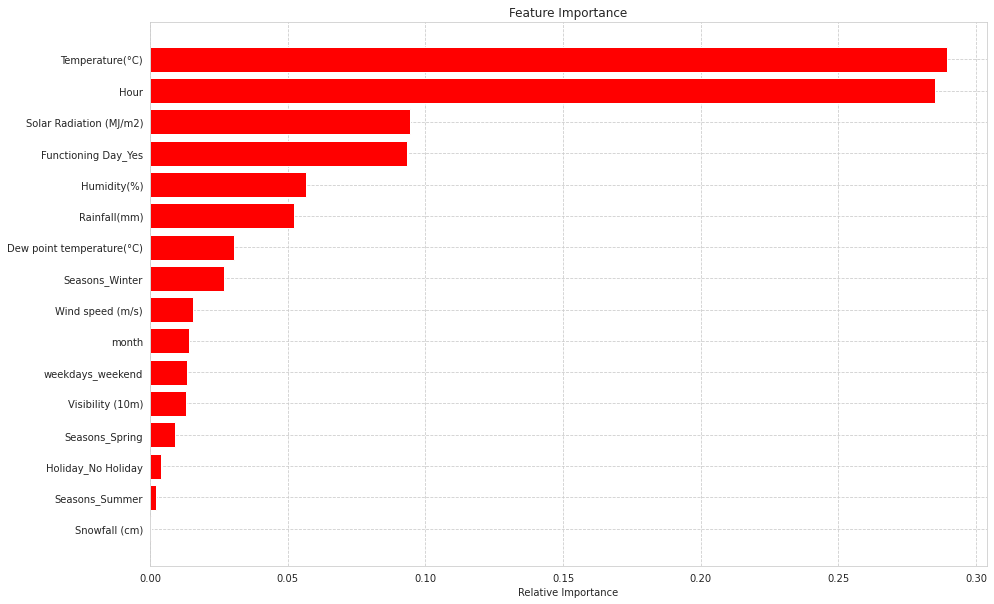

In [233]:
# getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

XGB

In [234]:
# importing XGBoost Regressor
from xgboost import XGBRegressor

In [235]:
# creating Xgboost model
xgb_model=XGBRegressor()

In [236]:
# creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [237]:
# creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)

[04:52:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

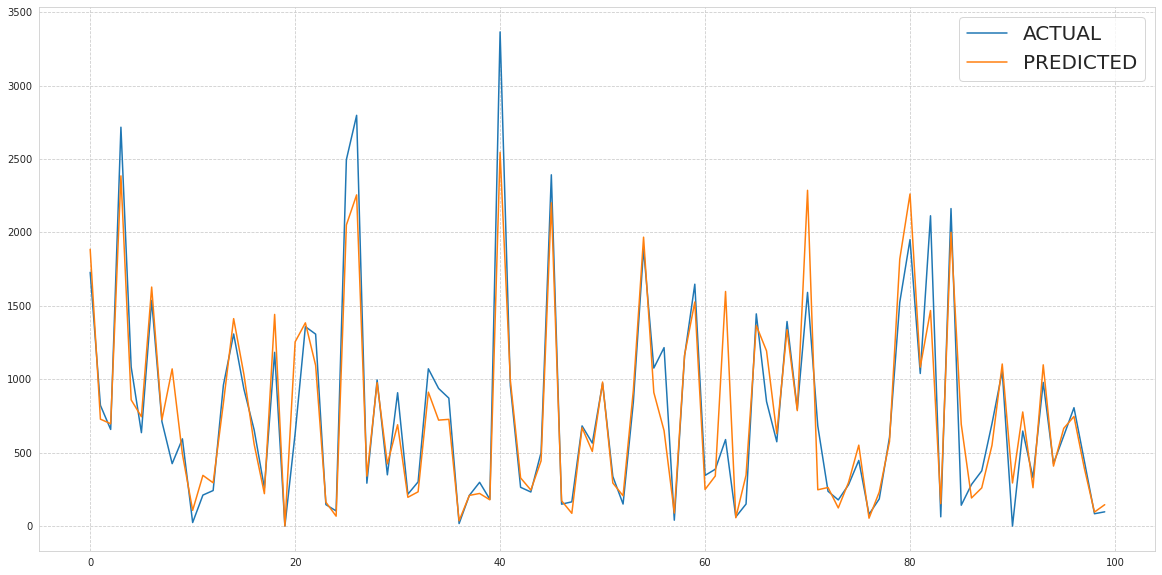

In [238]:
# calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [239]:
# getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

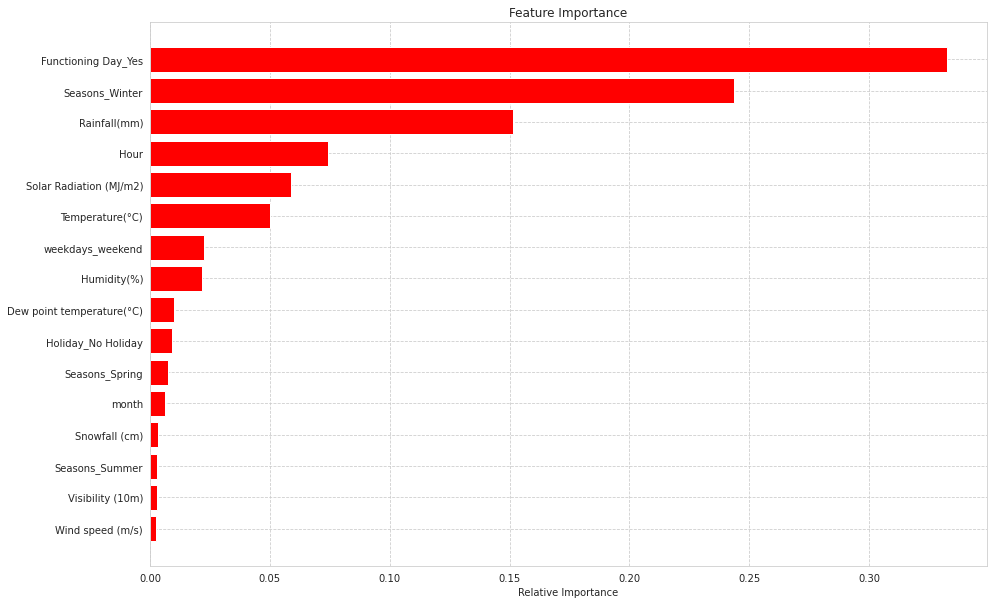

In [240]:
# getting feature importance of xgb model
get_features_importance(optimal_xgb_model,X_train)

CATBOOST

In [181]:
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [241]:
# importing cat boost Regressor
from catboost import CatBoostRegressor

In [242]:
# creating Catboost model
cb = CatBoostRegressor(verbose=0)


================Evalution Matrix=========================

MSE : 36706.5353729677
RMSE : 191.58949703198164
R2 : 0.910297049908164
Adjusted R2 :  0.9096365587892181


    =========================================================    Evalution Graph    ===================================================



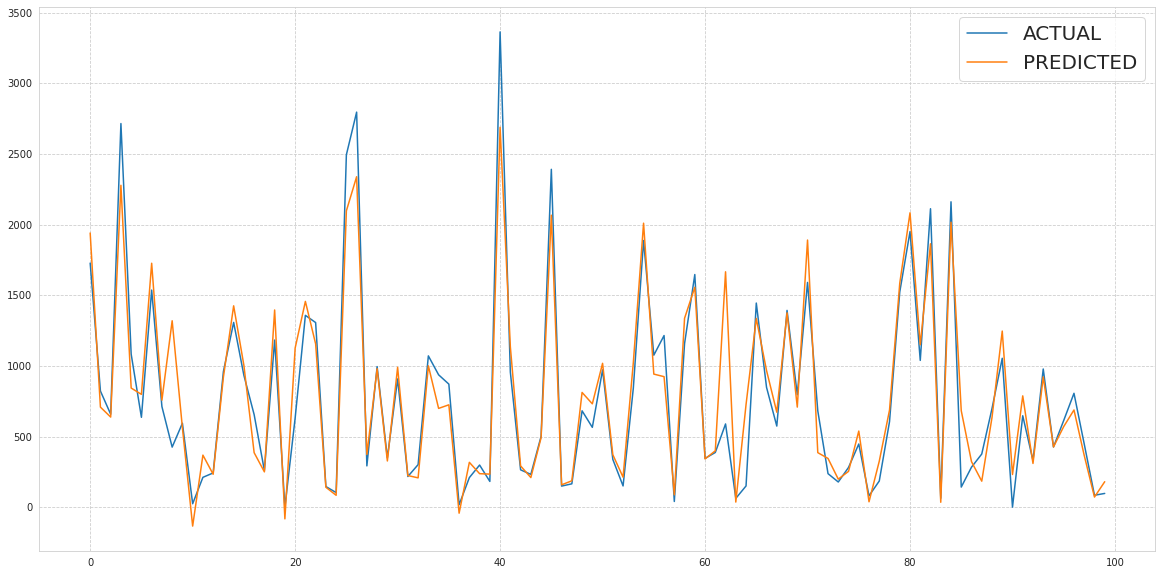

In [243]:
# calling run_model to train,fit and evalution of catboost model
run_model(cb,X_train,y_train,X_test,y_test)

In [244]:
#checking params of cat boost model
cb.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': True,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'classes_count': 0,
 'depth': 6,
 'eval_metric': 'RMSE',
 'feature_border_type': 'GreedyLogSum',
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.05512600019574165,
 'loss_function': 'RMSE',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'model_shrink_mode': 'Constant',
 'model_shrink_rate': 0,
 'model_size_reg': 0.5,
 'nan_mode': 'Min',
 'penalties_coefficient': 1,
 'pool_metainfo_options': {'tags': {}},
 'posterior_sampling': False,
 'random_seed': 0,
 'random_strength': 1,
 'rsm': 1,
 'sampling_frequency': 'PerTree',
 'score_function': 'Cosine',
 'sparse_features_conflict_fracti

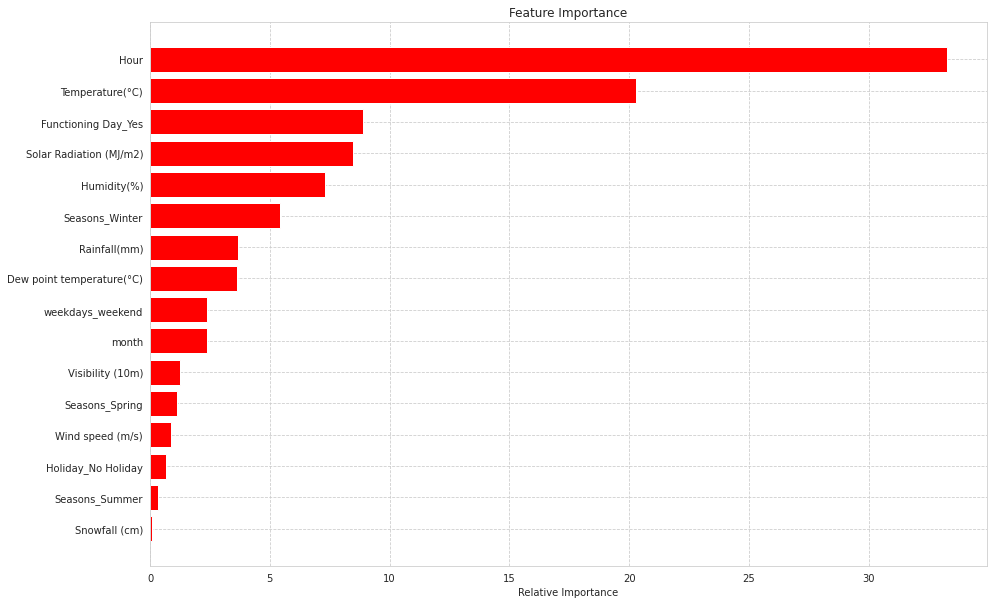

In [245]:
# getting and visualizing features importance of catboost model
get_features_importance(cb,X_train)

# Combined Evaluation Matrix of All the models

In [246]:
# creating dictionary to store all the metrices 

all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}
all_model_matrices

{'Adjusted_R2': [0.5697661367350404,
  0.569838775082856,
  0.5706031723655443,
  0.5703632172640354,
  0.7946585390600998,
  0.7778430588072479,
  0.8473718766188973,
  0.8650472920127829,
  0.8995278312146829,
  0.9096365587892181],
 'Mean_square_error': [175590.55287332062,
  175560.90711843758,
  175248.93506569506,
  175346.86749857932,
  83411.75920852358,
  90242.37579908676,
  61999.07323947347,
  54819.14237701159,
  40812.80181566378,
  36706.5353729677],
 'R2': [0.5729108337712393,
  0.5729829411854939,
  0.5737417512792726,
  0.5735035500752621,
  0.7961594359879383,
  0.7794668646816582,
  0.8484874773379918,
  0.8660336982840462,
  0.9002622097896327,
  0.910297049908164],
 'Root_Mean_square_error': [419.035264474627,
  418.9998891627987,
  418.6274418450074,
  418.74439399062925,
  288.81094025075225,
  300.4036880583971,
  248.9961309728998,
  234.1348807354675,
  202.02178549766305,
  191.58949703198164]}

In [247]:
# list of all model made

model_name=['Linear','Lasso','Ridge','Elasticnet','K-Nearest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CatBoost']


In [248]:
# converting dictionary to dataframe for easy visual

matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)


In [125]:
matrices_df

,Linear,Lasso,Ridge,Elasticnet,K-Nearest_Neighbor,Decision_Tree,Random_Forest,Gradient_Boosting,Xtreme_GB,CatBoost,1,2,3,4
Mean_square_error,175590.552873,175590.552873,175590.552873,175590.552873,175590.552873,175560.907118,175248.935066,175346.867499,83411.759209,87314.115982,62641.716961,54812.268153,40812.801816,36706.535373
Root_Mean_square_error,419.035264,419.035264,419.035264,419.035264,419.035264,418.999889,418.627442,418.744394,288.810940,295.489621,250.283273,234.120200,202.021785,191.589497
R2,0.572911,0.572911,0.572911,0.572911,0.572911,0.572983,0.573742,0.573504,0.796159,0.786623,0.846917,0.866050,0.900262,0.910297
Adjusted_R2,0.569766,0.569766,0.569766,0.569766,0.569766,0.569839,0.570603,0.570363,0.794659,0.785052,0.845790,0.865064,0.899528,0.909637


In [249]:
# transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})


In [252]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,175590.552873,419.035264,0.572911,0.569766
1,Lasso,175560.907118,418.999889,0.572983,0.569839
2,Ridge,175248.935066,418.627442,0.573742,0.570603
3,Elasticnet,175346.867499,418.744394,0.573504,0.570363
4,K-Nearest_Neighbor,83411.759209,288.810940,0.796159,0.794659
5,Decision_Tree,90242.375799,300.403688,0.779467,0.777843
6,Random_Forest,61999.073239,248.996131,0.848487,0.847372
7,Gradient_Boosting,54819.142377,234.134881,0.866034,0.865047
8,Xtreme_GB,40812.801816,202.021785,0.900262,0.899528
9,CatBoost,36706.535373,191.589497,0.910297,0.909637


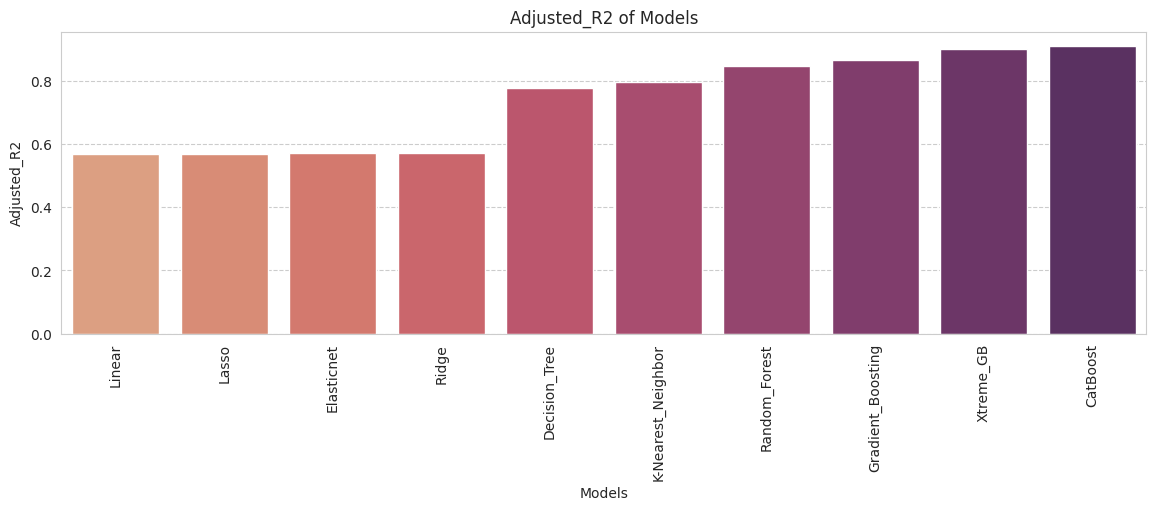

In [251]:
# creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjusted_R2 of Models')
plt.xticks(rotation=90);

# Final Conclusion

1.In holiday or non-working days there is demands in rented bikes.

2.There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3.People prefered more rented bikes in the morning than the evening.

4.When the rainfall was less, people have booked more bikes except some few cases.

5.The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

6.After performing the various models the Xgb and Catboost found to be the best model that can be used for the Bike Sharing Demand Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) shows a higher value for the Xgb and Catboost models!

9.We can use either Xgb or catboost model for the bike rental stations.